# How to read the skytiles file

The file contains extensions with the number of the sky tile. For each extension, which can be read as tiles[n] with n the number of the sky tile, there is a different number of records containing the metadata of each sky cell. 

## Structure of file

In [28]:
import asdf
tiles = asdf.open("skytiles.asdf")
tiles.info()

root (AsdfObject)
├─asdf_library (Software) ...
├─history (dict) ...
├─0 (NDArrayType): shape=(2401,), dtype=void1920
├─1 (NDArrayType): shape=(2413,), dtype=void1920
├─2 (NDArrayType): shape=(2413,), dtype=void1920
├─3 (NDArrayType): shape=(2413,), dtype=void1920
├─4 (NDArrayType): shape=(2413,), dtype=void1920
├─5 (NDArrayType): shape=(2413,), dtype=void1920
├─6 (NDArrayType): shape=(2413,), dtype=void1920
├─7 (NDArrayType): shape=(2413,), dtype=void1920
├─8 (NDArrayType): shape=(2413,), dtype=void1920
├─9 (NDArrayType): shape=(2403,), dtype=void1920
├─10 (NDArrayType): shape=(2403,), dtype=void1920
├─11 (NDArrayType): shape=(2403,), dtype=void1920
├─12 (NDArrayType): shape=(2403,), dtype=void1920
├─13 (NDArrayType): shape=(2403,), dtype=void1920
├─14 (NDArrayType): shape=(2403,), dtype=void1920
├─15 (NDArrayType): shape=(2403,), dtype=void1920
├─16 (NDArrayType): shape=(2403,), dtype=void1920
├─17 (NDArrayType): shape=(2403,), dtype=void1920
├─18 (NDArrayType): shape=(2403,), dtype=

## Fields of sky cell metadata

In [32]:
print(tiles[0].dtype)

[('name', '<U16'), ('tile_index', '<i4'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('x_center', '<f4'), ('y_center', '<f4'), ('orientat', '<f4'), ('nx', '<i4'), ('ny', '<i4'), ('x0_projection', '<f8'), ('y0_projection', '<f8'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8'), ('pixel_scale', '<f4'), ('ra_projection_center', '<f8'), ('dec_projection_center', '<f8'), ('orientat_projection_center', '<f4'), ('ra_tile_min', '<f8'), ('ra_tile_max', '<f8'), ('dec_tile_min', '<f8'), ('dec_tile_max', '<f8')]


## Number of sky cells 

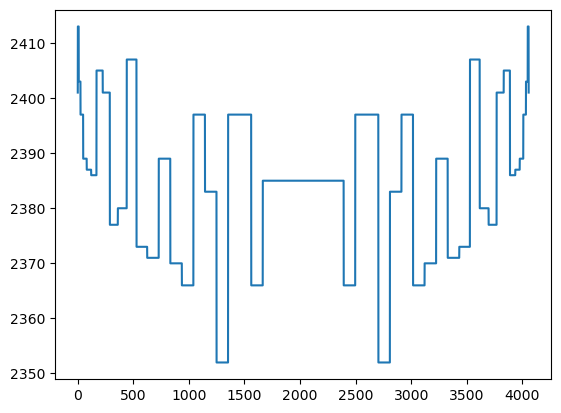

Median number of sky cells:  2385.0


In [33]:
# Number of sky cells for each sky tile
import matplotlib.pyplot as plt
import numpy as np
ntiles = len(tiles.keys())-2
lentiles = [len(tiles[i]) for i in range(ntiles)]
plt.plot(lentiles)
plt.show()
print('Median number of sky cells: ', np.median(lentiles))

## Contours in RA, Dec of sky cells for a give sky tile

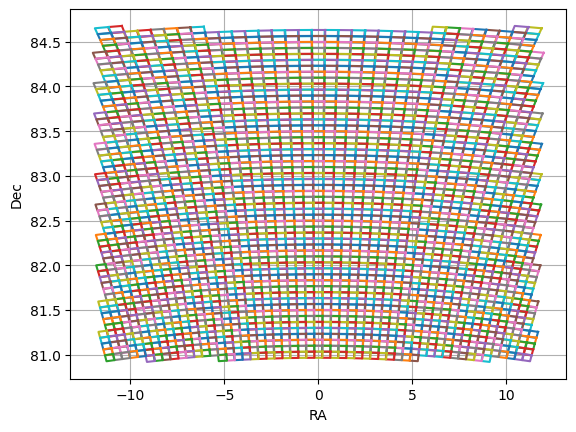

In [67]:
ncell = 9
for c in tiles[ncell]:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1])
plt.grid()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

Taking into account the effect of declination and orientation ...

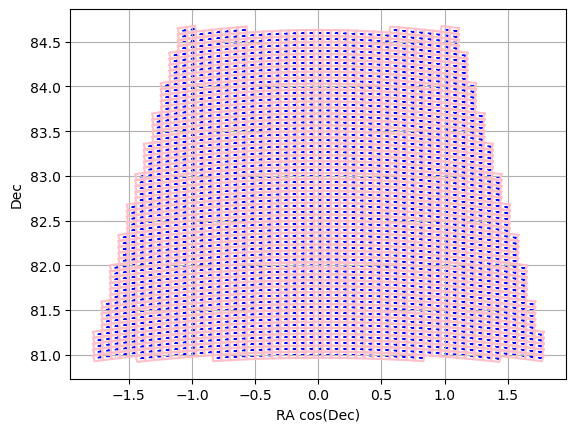

In [72]:
dd = 1./60
for c in tiles[ncell]:
    ac = c['ra_center']
    dc = c['dec_center']
    orient = (0 - c['orientat']) * np.pi/180
    cosfac = np.cos(dc * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    ac = (ac - c0) * cosfac + c0
    c1 = (c1 - c0) * cosfac + c0
    c2 = (c2 - c0) * cosfac + c0
    c3 = (c3 - c0) * cosfac + c0
    c4 = (c4 - c0) * cosfac + c0
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')
    dx = dd * np.cos(orient)
    dy = dd * np.sin(orient)
    plt.arrow(ac,dc,dx, dy,head_width=0.01, color='blue')
plt.grid()
plt.xlabel('RA cos(Dec)')
plt.ylabel('Dec')
#plt.xlim(224,226)
#plt.ylim(89,90)
plt.show()

### Polar cap

It is better to plot it in polar coordinates

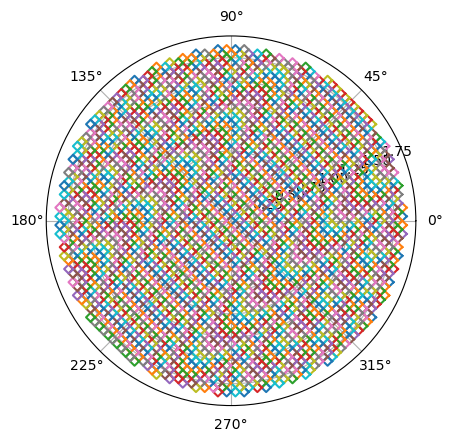

In [74]:
import numpy as np
ncell = 0
dd = 0.04
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for c in tiles[ncell]:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = 90-c['dec_corn1']
    d2 = 90-c['dec_corn2']
    d3 = 90-c['dec_corn3']
    d4 = 90-c['dec_corn4']
    ax.plot(np.array([c1, c2, c3, c4, c1])* np.pi/180,
            [d1, d2, d3, d4, d1])
    ac = c['ra_center']* np.pi/180
    dc = 90-c['dec_center']
    orient = (90 - c['orientat']) * np.pi/180
    #plt.arrow(ac,dc,0,-dd,head_width=0.01, color='blue')
             
plt.show()

## Reading information, field by field

In [6]:
nskytile = 10
nskycell = 100
tile = tiles[nskytile]
cell = tile[nskycell]
for field in tile.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(cell[field])))

 name                       a022dp83xp21yp17
 tile_index                 10
 ra_center                  32.0659
 dec_center                 81.549
 x_center                   2500.0
 y_center                   2500.0
 orientat                   0.0
 nx                         5000
 ny                         5000
 x0_projection              -100800.0
 y0_projection              81600.0
 ra_corn1                   32.3386
 dec_corn1                  81.5775
 ra_corn2                   31.871
 dec_corn2                  81.5889
 ra_corn3                   31.795
 dec_corn3                  81.5204
 ra_corn4                   32.2589
 dec_corn4                  81.5091
 pixel_scale                0.05
 ra_projection_center       22.5
 dec_projection_center      82.7981
 orientat_projection_center  0.0
 ra_tile_min                11.25
 ra_tile_max                33.75
 dec_tile_min               80.9942
 dec_tile_max               84.6001


# Check of astrometry

If I define the astrometry from the cell, can I recover the R.A. and Dec. values computed in the metadata from the tile astrometry ?

In [113]:
from astropy.wcs import WCS

nskytile = 1
nskycell = 10
tile = tiles[nskytile]
ntiles = len(tiles.keys())-2
c = tile[nskycell]

ac = c['ra_center']
dc = c['dec_center']
orient = c['orientat']

# Define the astrometry of the sky cell
wcs = WCS(naxis=2)
pix = c['pixel_scale']/3600
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [2500,2500]
wcs.wcs.crota = [0,orient]  # CROTA2 is the rotation angle

In [114]:
# Corners
x = [1,5000,5000,1]
y = [1,1,5000,5000]
a, d = wcs.wcs_pix2world(x, y, 1)

ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

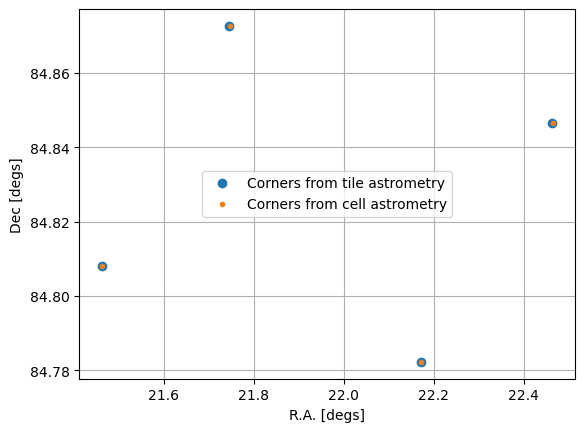

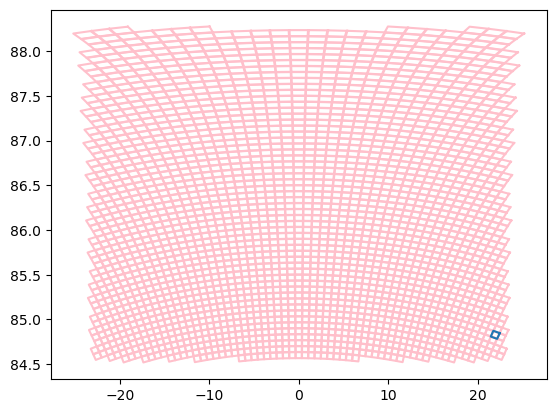

In [115]:
import matplotlib.pyplot as plt
plt.plot(ca, cd,'o',label='Corners from tile astrometry')
plt.plot( a ,d ,'.',label='Corners from cell astrometry')
plt.legend()
plt.grid()
plt.xlabel('R.A. [degs]')
plt.ylabel('Dec [degs]')
plt.show()


for c in tiles[nskytile]:
    c0 = c['ra_projection_center']
    ac = c['ra_center']
    dc = c['dec_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')

ca.append(ca[0])
cd.append(cd[0])
plt.plot(ca,cd)
plt.show()
